In [1]:
import numpy as np 
import pandas as pd 

df = pd.read_csv("IMDB Dataset.csv")

In [2]:
import pandas as pd
import csv
import re 
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('IMDB Dataset.csv')

# Data Exploration/Basic EDA

### Peaking in dataset

In [4]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

### Shape of Data

In [5]:
df.shape

(50000, 2)

### Size of Data

In [6]:
df.size

100000

### Describing Data

In [7]:
df.describe()

review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000

### Attributes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### Count of Positive and Negative Reviews

In [9]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [10]:
df0=df[df['sentiment']== 'positive']
df1=df[df['sentiment'] == 'negative']
df0.shape[0], df1.shape[0]

(25000, 25000)

#### there are 25k postive and 25k negative reviews

## WORD CLOUD

### positive reviews

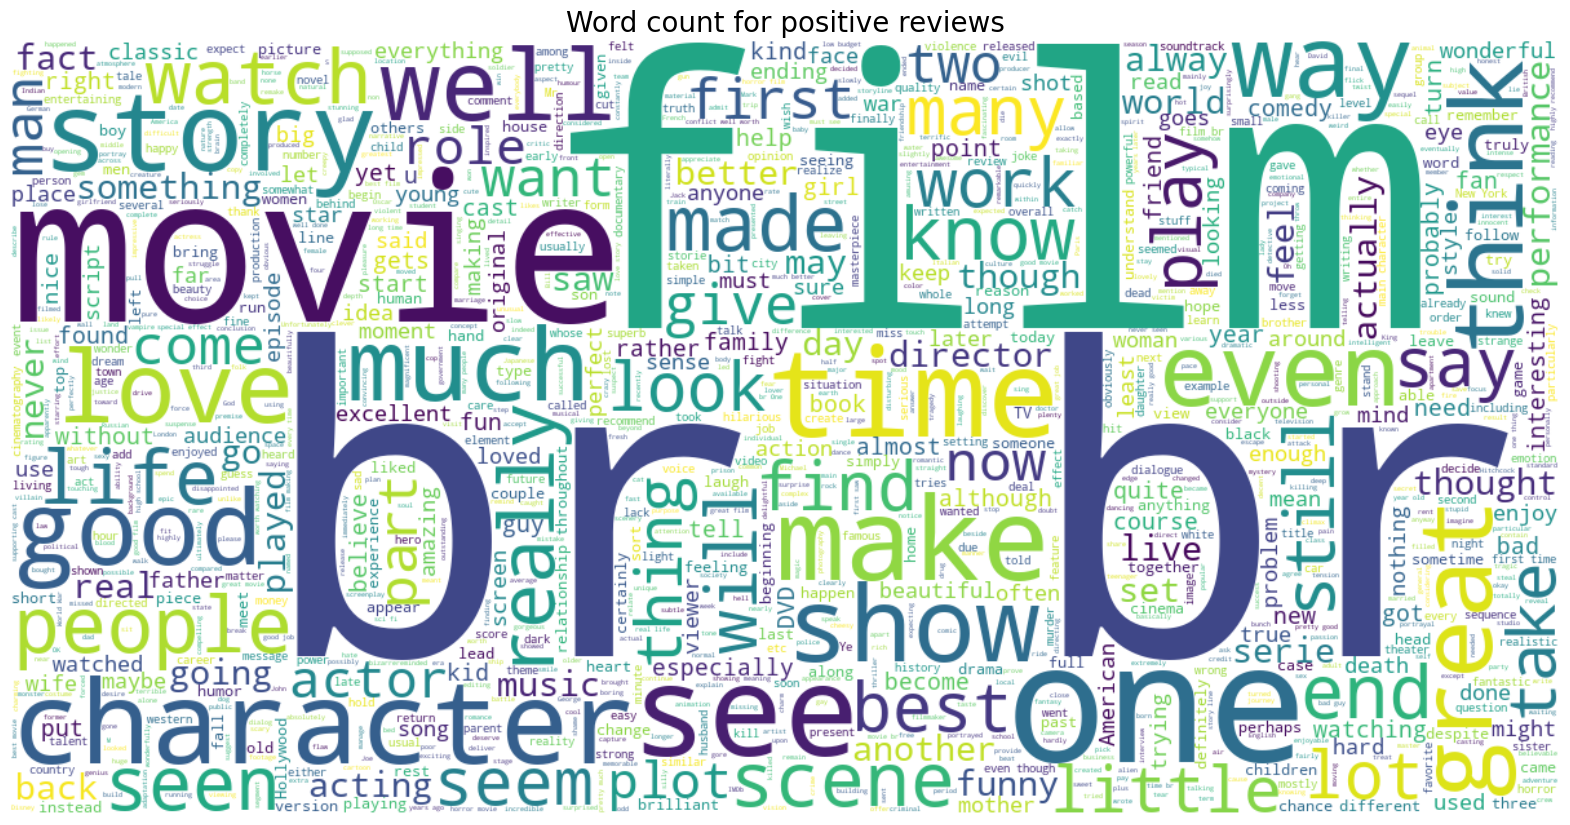

In [11]:
from wordcloud import WordCloud
positive_review = df[df.sentiment == 'positive']["review"]
positive_review_string = ' '.join(positive_review)
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1200,width = 1200, height=600,background_color= "white").generate(positive_review_string)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("Word count for positive reviews",fontsize=20)
plt.show()

### negative reviews

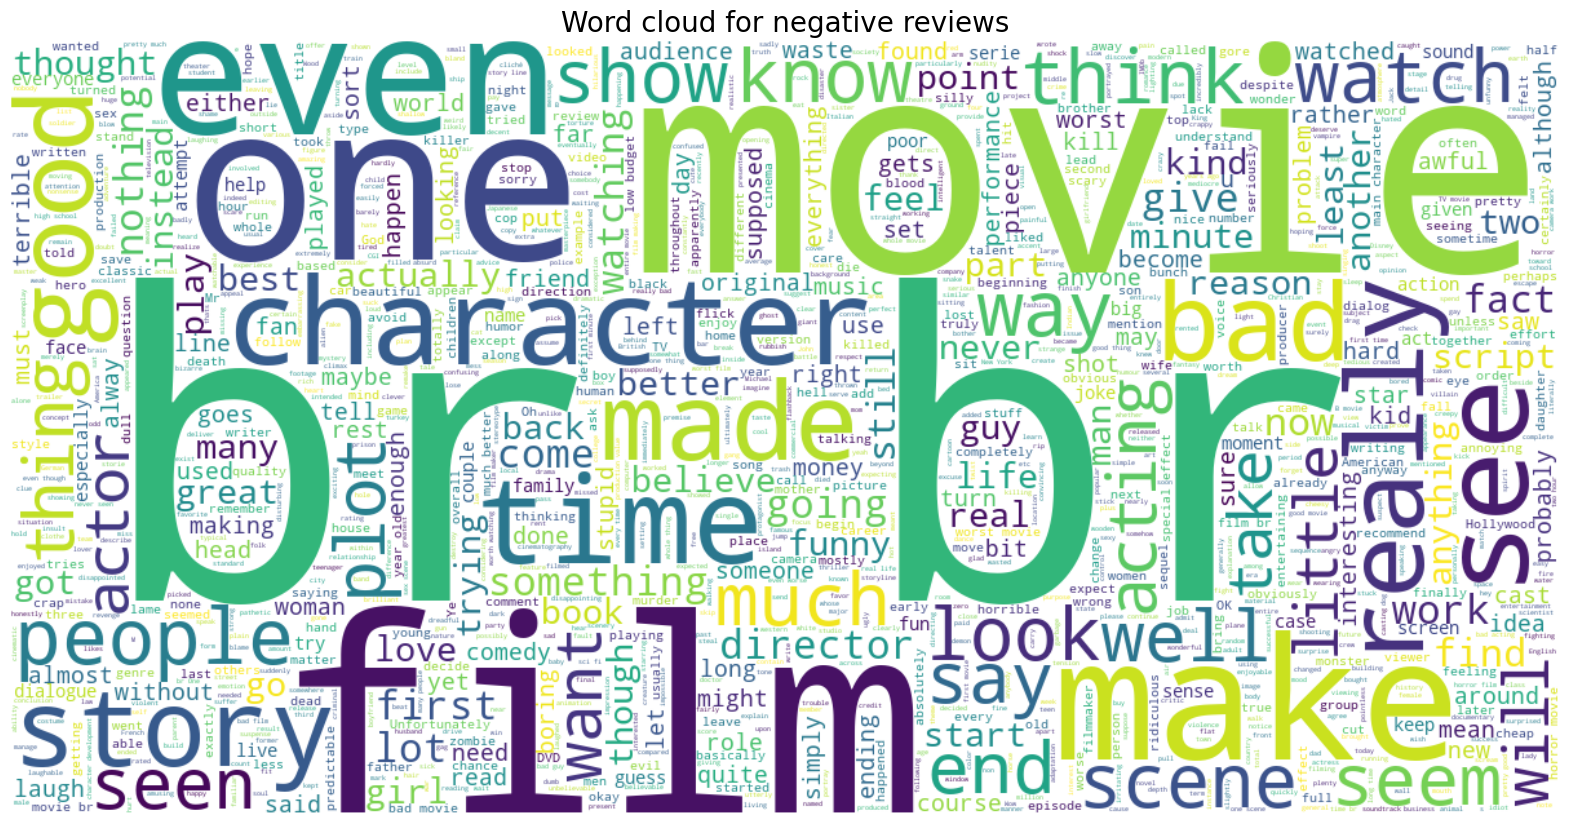

In [12]:
negative_data = df[df.sentiment == 'negative']['review']
negative_data_string = ' '.join(negative_data)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

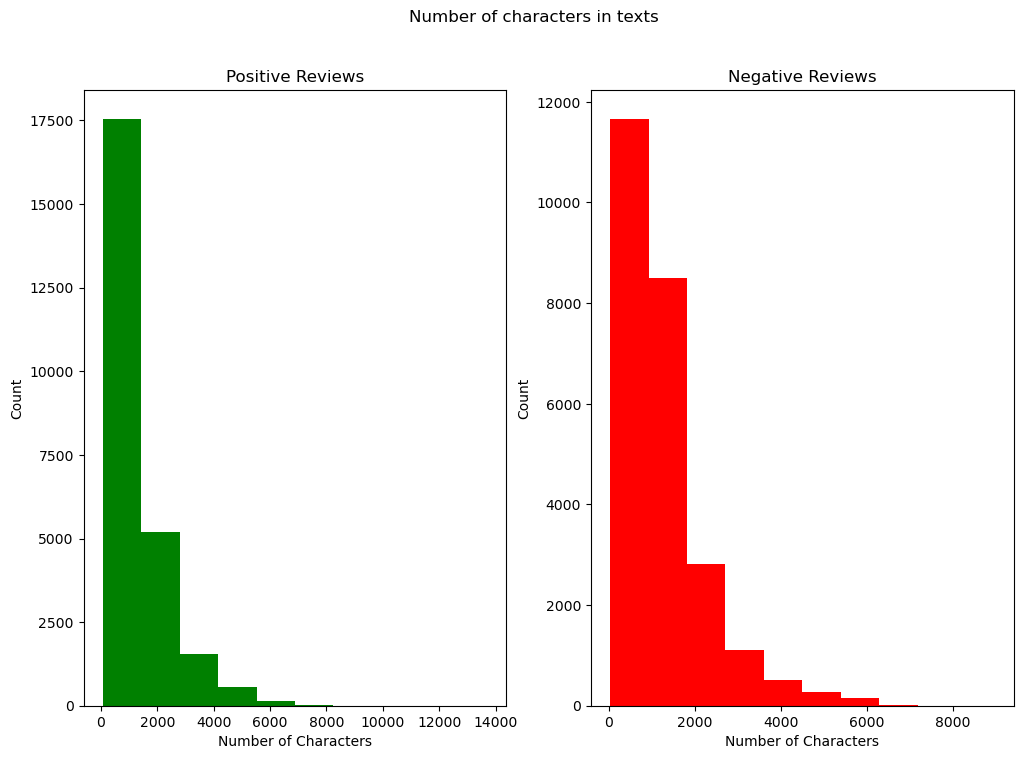

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=positive_review.str.len()
ax1.hist(text_len,color='green')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('Number of Characters')
ax1.set_ylabel('Count')
text_len=negative_data.str.len()
ax2.hist(text_len,color='red')
ax2.set_title('Negative Reviews')
ax2.set_xlabel('Number of Characters')
ax2.set_ylabel('Count')
fig.suptitle('Number of characters in texts')
plt.show()

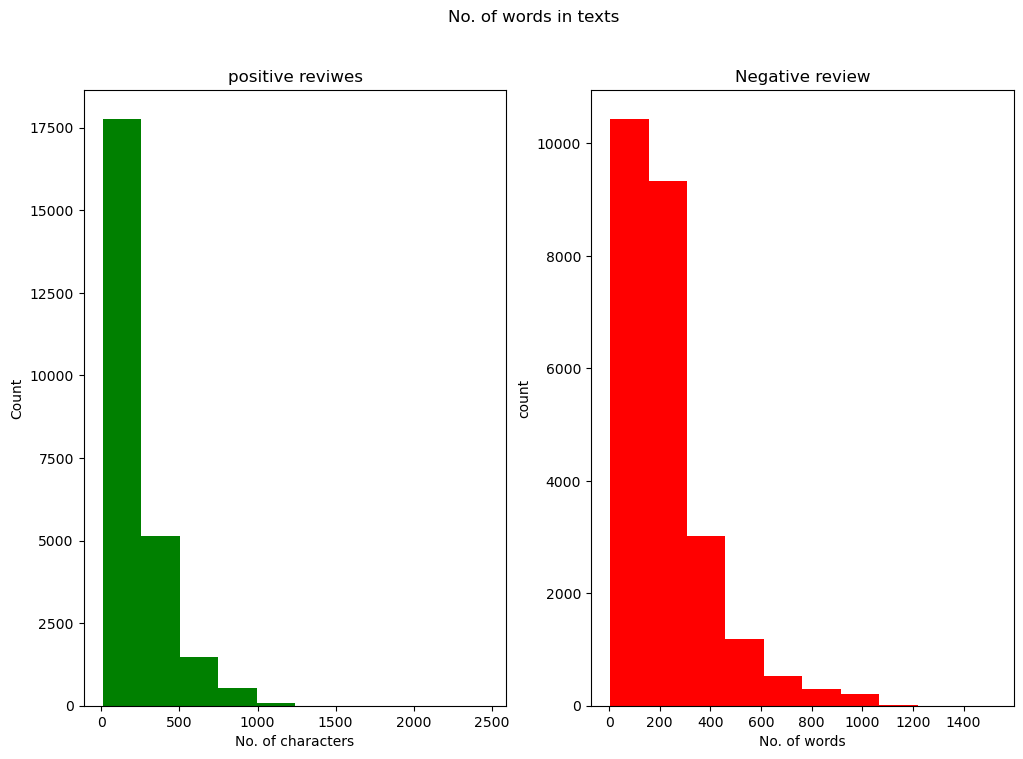

In [14]:
fig,(ax1,ax2) =plt.subplots(1,2,figsize=(12,8))
text_len = positive_review.str.split().map(lambda x: len(x))
ax1.hist(text_len,color='green')
ax1.set_title("positive reviwes")
ax1.set_xlabel("No. of characters")
ax1.set_ylabel("Count")
text_len = negative_data.str.split().map(lambda x: len(x))
ax2.hist(text_len,color="red")
ax2.set_title("Negative review")
ax2.set_xlabel("No. of words")
ax2.set_ylabel("count")
fig.suptitle("No. of words in texts")
plt.show()

## Most common postive words and negative words

In [15]:
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [16]:
def get_corpus(data):
    corpus = []
    for i in data:
        for j in i.split():
            corpus.append(j.strip())
    return corpus
corpus = get_corpus(df.review)
corpus[:5]

['One', 'of', 'the', 'other', 'reviewers']

In [17]:
from collections import Counter
count = Counter(corpus)
most_words = count.most_common(10)
most_common = pd.DataFrame(most_words,columns=["words","count_"])
# Sorting 
most_common= most_common.sort_values('count_')
most_common

words  count_
9  this  113726
8  that  126818
7     I  132498
6    in  169981
5    is  203056
4    to  261850
3    of  283625
2   and  301919
1     a  306960
0   the  568735

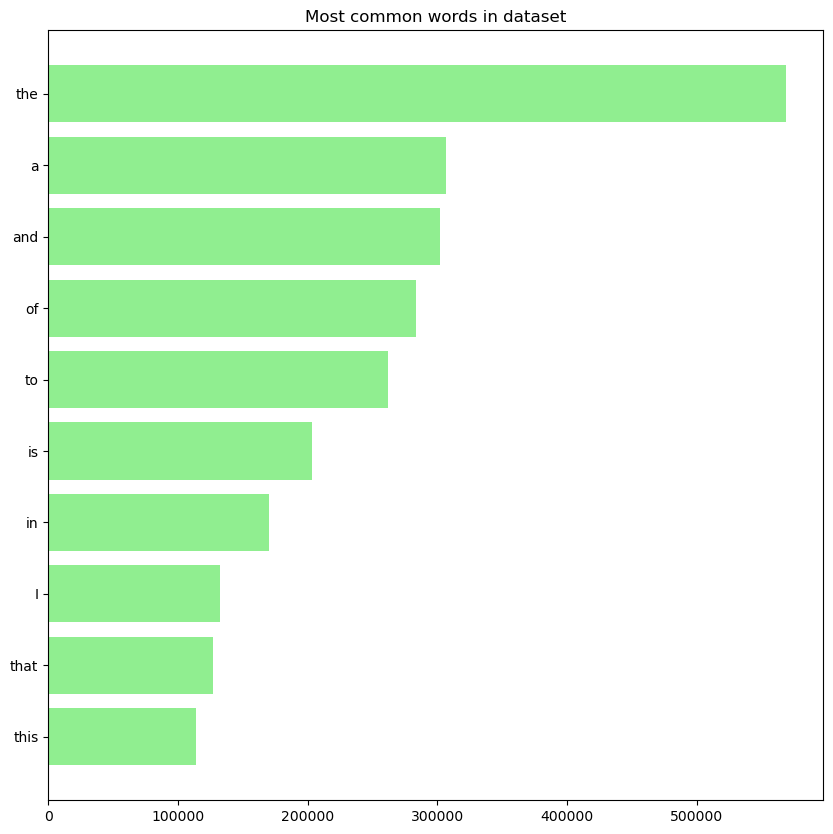

In [18]:
plt.figure(figsize=(10,10))
plt.yticks(range(len(most_common)),list(most_common.words))
plt.barh(range(len(most_common)),list(most_common.count_),align='center',color = 'lightgreen')
plt.title("Most common words in dataset")
plt.show()

# DATA PREPROCESSING

### checking for null values

In [19]:
total_null = df.isnull().sum().sort_values(ascending = False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", df.shape[0])

missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data

Total records =  50000


Total Missing  In Percent
review                 0         0.0
sentiment              0         0.0

### no NULL values found

## reducing dataset

In [20]:
df0=df[df['sentiment']== 'positive']
df1=df[df['sentiment'] == 'negative']
df0.shape, df1.shape

((25000, 2), (25000, 2))

In [21]:
df0=df0[:int(df0.shape[0]/10)]
df1=df1[:int(df1.shape[0]/10)]
df0.shape, df1.shape

((2500, 2), (2500, 2))

In [22]:
df=pd.concat([df0,df1],axis=0)
df = df.sample(frac = 1)
df.shape

(5000, 2)

In [23]:
df.head()

review sentiment
4511  I've watched a lot of television in my 51 year...  positive
5012  My friend made me sit down and watch this film...  positive
1899  Before seeing this, I was merely expecting ano...  positive
1579  When Braveheart first came out, I was enthrall...  positive
1002  I can't believe that those praising this movie...  negative

## removing Hashtags, Mentions, URL

In [24]:
#Remove Hashtags
df['review'].replace( { r"#(\w+)" : '' }, inplace= True, regex = True)

#Remove Mention
df['review'].replace( { r"@(\w+)" : '' }, inplace= True, regex = True)

#Remove URL
df['review'].astype(str).replace( { r"http\S+" : '' }, inplace= True, regex = True)

#to lowercase
df['review']=df['review'].str.lower()

In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\addan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## removing Stop words

In [28]:
# Import stopwords with nltk.
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

## removing punctuations 

In [29]:
def punctuations_removal(text):
    puntuations = "[\.\?!,;:]+"
    text = re.sub(puntuations,"",text)
    return text

df['review'] = df['review'].apply(lambda x: punctuations_removal(x))

In [31]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\addan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## text stemming

In [32]:
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence.lower())
    stemmed_words = [stemmer.stem(word) for word in words if word not in stop]
    stemmed_sentence = " ".join(stemmed_words)
    return stemmed_sentence
df["review"] = df["review"].apply(stem_sentence)

In [33]:
df.head()

review sentiment
4511  've watch lot televis 51 year 've never much f...  positive
5012  friend made sit watch film materi `` god devil...  positive
1899  see mere expect anoth mediocr soft core copi m...  positive
1579  braveheart first came enthral admittedli one r...  positive
1002  ca n't believ prais movi herein think film pre...  negative

# same EDA graphs after reduction of dataset

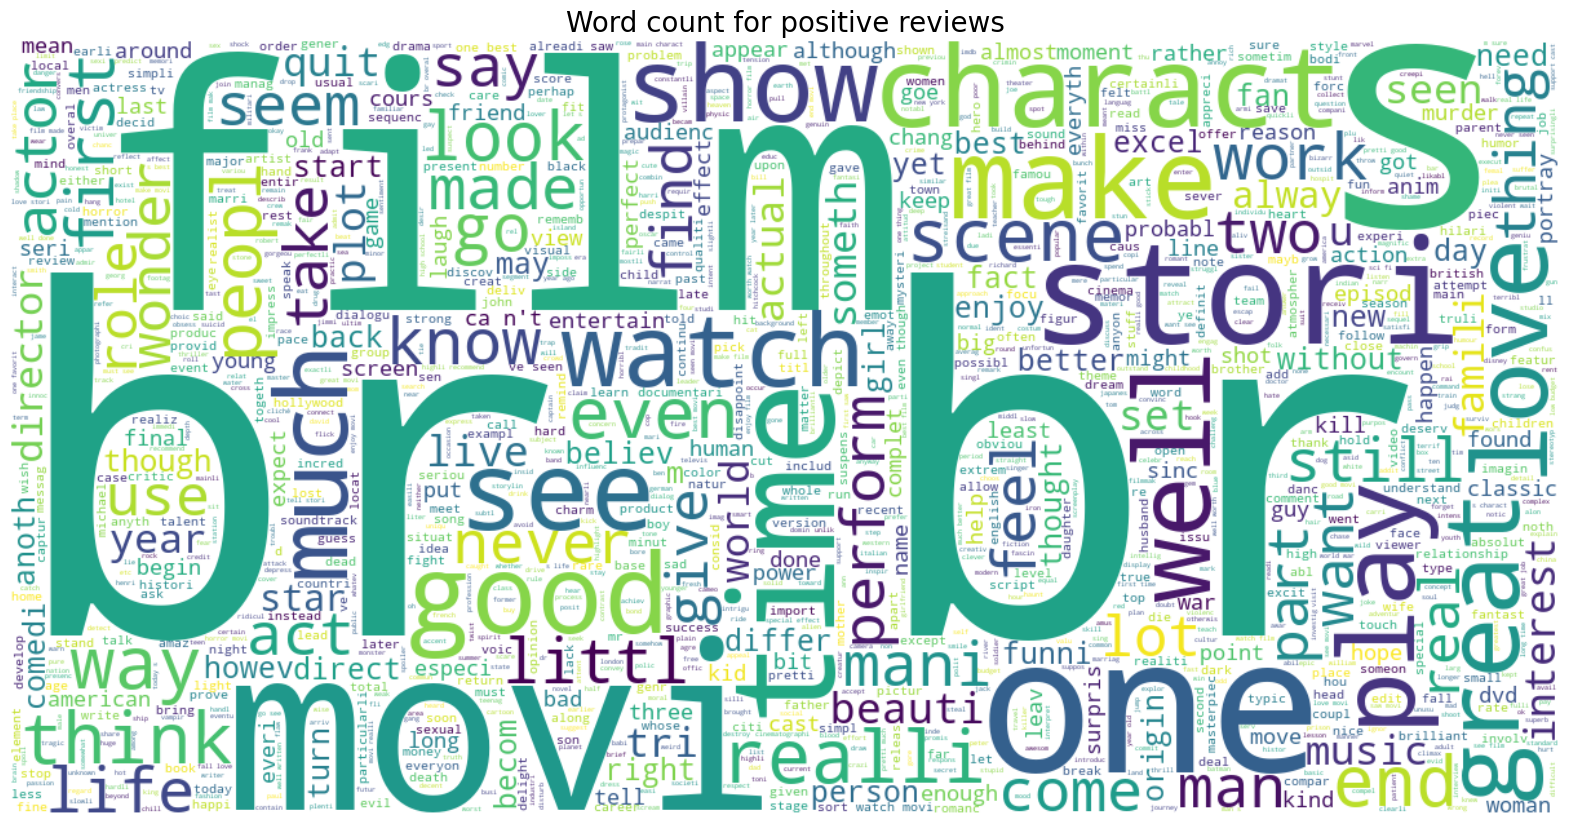

In [34]:
positive_review2 = df[df.sentiment == 'positive']["review"]
positive_review_string2 = ' '.join(positive_review2)
plt.figure(figsize=(20,20))
wc = WordCloud(max_words=1200,width = 1200, height=600,background_color= "white").generate(positive_review_string2)
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.title("Word count for positive reviews",fontsize=20)
plt.show()

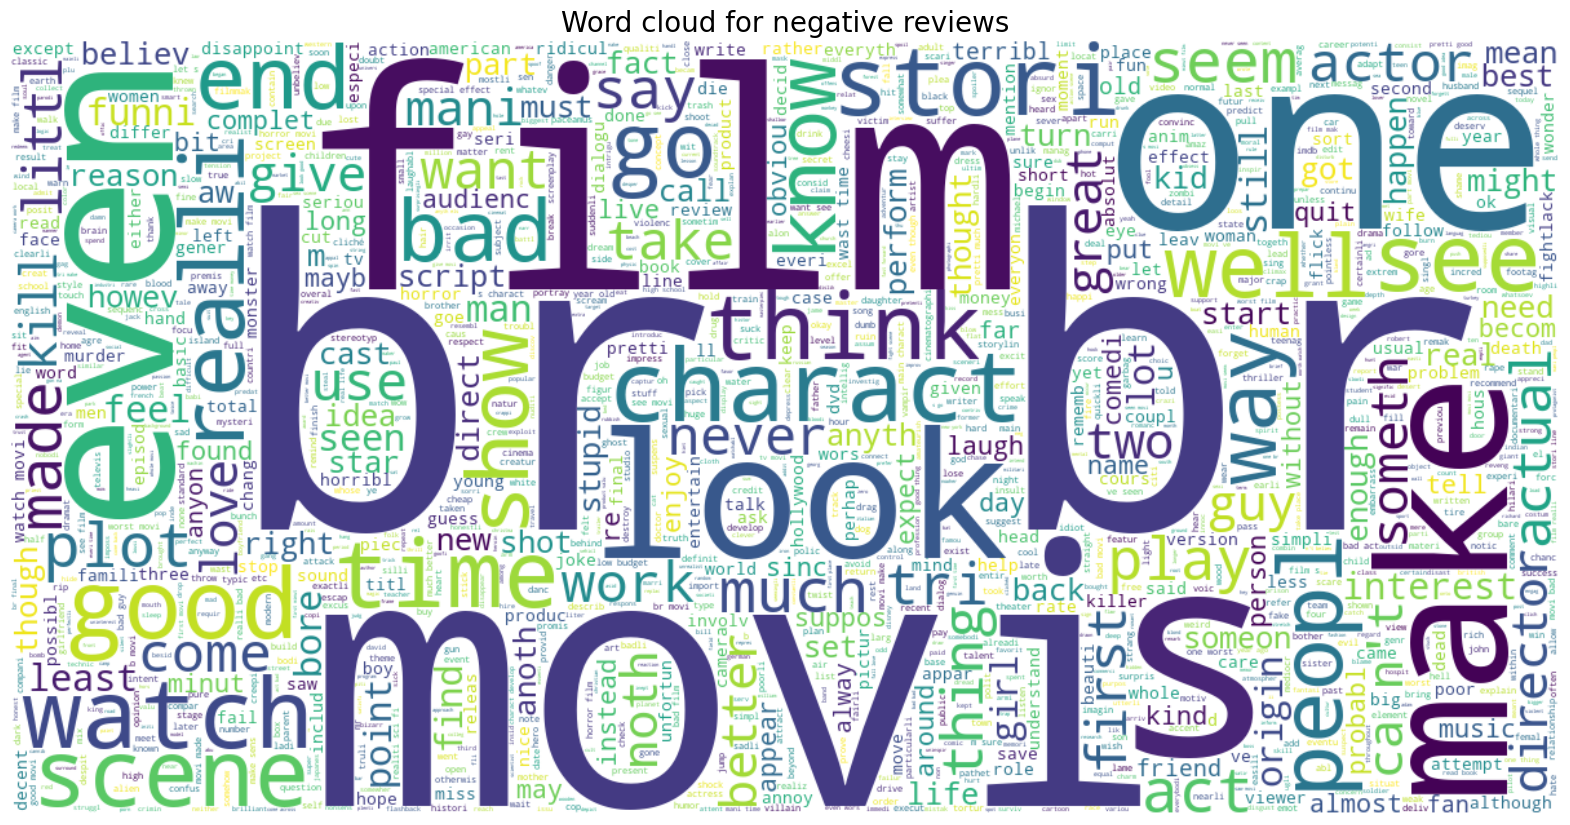

In [35]:
negative_data2 = df[df.sentiment == 'negative']['review']
negative_data_string2 = ' '.join(negative_data2)
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000, width=1200, height=600,background_color="white").generate(negative_data_string2)
plt.imshow(wc , interpolation = 'bilinear')
plt.axis('off')
plt.title('Word cloud for negative reviews',fontsize = 20)
plt.show()

In [36]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['sentiment']= label_encoder.fit_transform(df['sentiment'])
df.head()

review  sentiment
4511  've watch lot televis 51 year 've never much f...          1
5012  friend made sit watch film materi `` god devil...          1
1899  see mere expect anoth mediocr soft core copi m...          1
1579  braveheart first came enthral admittedli one r...          1
1002  ca n't believ prais movi herein think film pre...          0

In [37]:
y = df['sentiment']
x = df['review']

In [38]:
x

4511    've watch lot televis 51 year 've never much f...
5012    friend made sit watch film materi `` god devil...
1899    see mere expect anoth mediocr soft core copi m...
1579    braveheart first came enthral admittedli one r...
1002    ca n't believ prais movi herein think film pre...
                              ...                        
2898    interest movi base three jule vern 's novel co...
946     first rememb bump zani zucker brother jim abra...
483     one word describ movi weird record movi one da...
2299    bela lugosi get play one rare good guy role se...
824     mexican werewolf texa set small border town fu...
Name: review, Length: 5000, dtype: object

In [39]:
y

4511    1
5012    1
1899    1
1579    1
1002    0
       ..
2898    1
946     1
483     1
2299    1
824     0
Name: sentiment, Length: 5000, dtype: int32

## TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer


# Creating a word corpus for vectorization
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
    
vectorizer1 = TfidfVectorizer(max_features=1000)
X1 = vectorizer1.fit_transform(x)
feature_names1 = vectorizer1.get_feature_names()
denselist1 = X1.todense().tolist()
df = pd.DataFrame(denselist1, columns=feature_names1)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## BoW

In [41]:
corpus = []
for i in range(x.shape[0]):
    corpus.append(x.iloc[i])
    
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
denselist = X.todense().tolist()
train = pd.DataFrame(denselist, columns=feature_names)

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
x

4511    've watch lot televis 51 year 've never much f...
5012    friend made sit watch film materi `` god devil...
1899    see mere expect anoth mediocr soft core copi m...
1579    braveheart first came enthral admittedli one r...
1002    ca n't believ prais movi herein think film pre...
                              ...                        
2898    interest movi base three jule vern 's novel co...
946     first rememb bump zani zucker brother jim abra...
483     one word describ movi weird record movi one da...
2299    bela lugosi get play one rare good guy role se...
824     mexican werewolf texa set small border town fu...
Name: review, Length: 5000, dtype: object

In [43]:
y

4511    1
5012    1
1899    1
1579    1
1002    0
       ..
2898    1
946     1
483     1
2299    1
824     0
Name: sentiment, Length: 5000, dtype: int32

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier

In [45]:
# splitting the training and testing part from the data
X_temp, X_test, y_temp, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

# For creating a table of the accuracies in the end
accuracy = {'TF-IDF':[]}

# Linear Regression
regressor_LL_tf = LinearRegression()
regressor_LL_tf.fit(X_temp, y_temp)
y_predict_LL_tf = regressor_LL_tf.predict(X_test)
a=(regressor_LL_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Logistic Regression
regressor_LR_tf = LogisticRegression(C=1.0,penalty='l2',solver='newton-cg')
regressor_LR_tf.fit(X_temp, y_temp)
y_predict_LR_tf = regressor_LR_tf.predict(X_test)
a=(regressor_LR_tf.score(X_test, y_test))
accuracy['TF-IDF'].append(a)

# Decision Tree
model_DT_tf = DecisionTreeClassifier(criterion = 'gini', max_depth=2) 
model_DT_tf.fit(X_temp, y_temp)
y_predict_DT_tf = model_DT_tf.predict(X_test)
a=(model_DT_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# Random Forest
model_RF_tf = RandomForestClassifier(n_estimators= 100, max_features = 'log2')
model_RF_tf.fit(X_temp, y_temp)
y_predict_RF_tf = model_RF_tf.predict(X_test)
a=(model_RF_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# K-Neighbors Classifier
model_KN_tf = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 5, weights= 'distance') 
model_KN_tf.fit(X_temp, y_temp)
y_predict_KN_tf = model_KN_tf.predict(X_test)
a=(model_KN_tf.score(X_test,y_test))
accuracy['TF-IDF'].append(a)

# Evaluation
model = ['Linear','Logistic','DT','RF','KN']
data = {'model':model,'accuracy':accuracy['TF-IDF']}
compare_models = pd.DataFrame(data)


In [46]:
compare_models

model  accuracy
0    Linear  0.414117
1  Logistic  0.839000
2        DT  0.676000
3        RF  0.816000
4        KN  0.559000

## Plotting of accuracies

In [47]:
compare_models["accuracy"].tolist()

[0.41411651476281164, 0.839, 0.676, 0.816, 0.559]

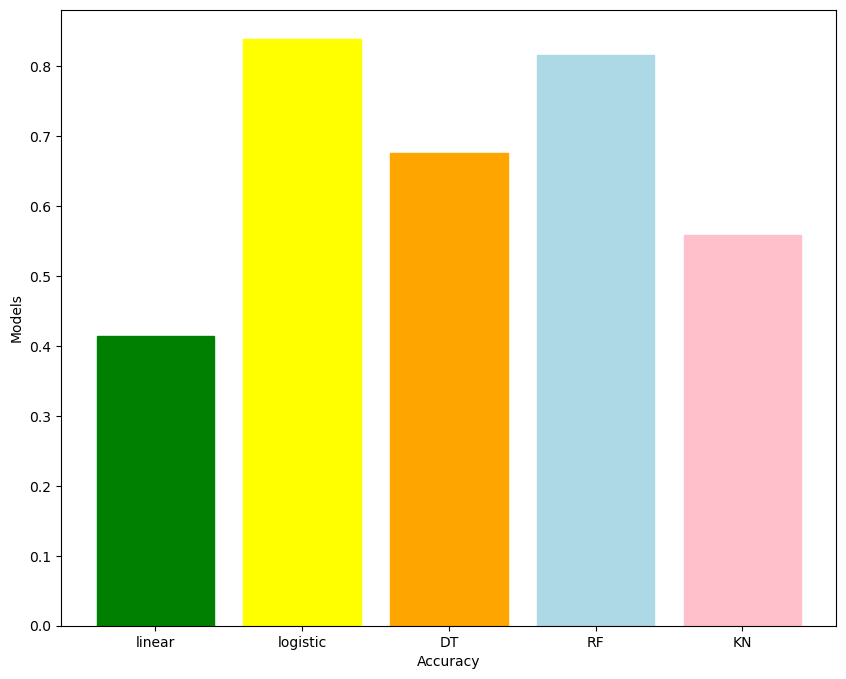

In [48]:
model = ['linear','logistic','DT','RF','KN']
acc = compare_models["accuracy"].tolist()
plt.figure(figsize=(10,8))
graph = plt.bar(model,acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')    
graph[0].set_color('green')
graph[1].set_color('yellow')
graph[2].set_color('orange')
graph[3].set_color('lightblue')
graph[4].set_color('pink')

# Hyperparamter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

### Linear Regression

In [50]:
lr = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'normalize': [True, False]})

In [51]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'fit_intercept': True, 'normalize': True}
Best accuracy:  0.37063117251205335


In [52]:
y_pred_lin_reg_ht = grid_search.predict(X_test)

### Logisctic Regression

In [53]:
param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2']
}
log = LogisticRegression(random_state=42, solver='liblinear')
grid_search = GridSearchCV(estimator=log, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1, param_grid={'C': [0.1, 1, 10], 'penalty': ['l2']})

In [54]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'C': 1, 'penalty': 'l2'}
Best accuracy:  0.85225


In [55]:
y_pred_log_ht = grid_search.predict(X_test)

### Decision Tree

In [56]:
param_grid = {
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5]})

In [57]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy:  0.6867499999999999


In [58]:
y_pred_dt_ht = grid_search.predict(X_test)

### Random Forest


In [59]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [2, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1]
}
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 4], 'min_samples_leaf': [1],
                         'min_samples_split': [2, 5], 'n_estimators': [50]})

In [60]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best accuracy:  0.7907500000000001


In [61]:
y_pred_rf_ht = grid_search.predict(X_test)

### KNN

In [62]:
param_grid = {
    'n_neighbors': [3, 5],
    'weights': ['uniform', 'distance']
}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_temp, y_temp)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5],
                         'weights': ['uniform', 'distance']})

In [63]:
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'n_neighbors': 5, 'weights': 'uniform'}
Best accuracy:  0.68325


In [64]:
y_pred_knn_ht = grid_search.predict(X_test)

## Accuracies calculations after Hypertuning

In [65]:
#lin_reg_acc_ht=accuracy_score(y_test,y_pred_lin_reg_ht)
log_reg_acc_ht=accuracy_score(y_test,y_pred_log_ht)
dt_acc_ht=accuracy_score(y_test,y_pred_dt_ht)
rf_acc_ht=accuracy_score(y_test,y_pred_rf_ht)
knn_acc_ht=accuracy_score(y_test,y_pred_knn_ht)

## PLotting accuracies

In [66]:
names=['Logistic Regression', 'Decision Tree Classification' ,'Random Forest Classification','KNN']
acc=[log_reg_acc_ht,dt_acc_ht,rf_acc_ht,knn_acc_ht]

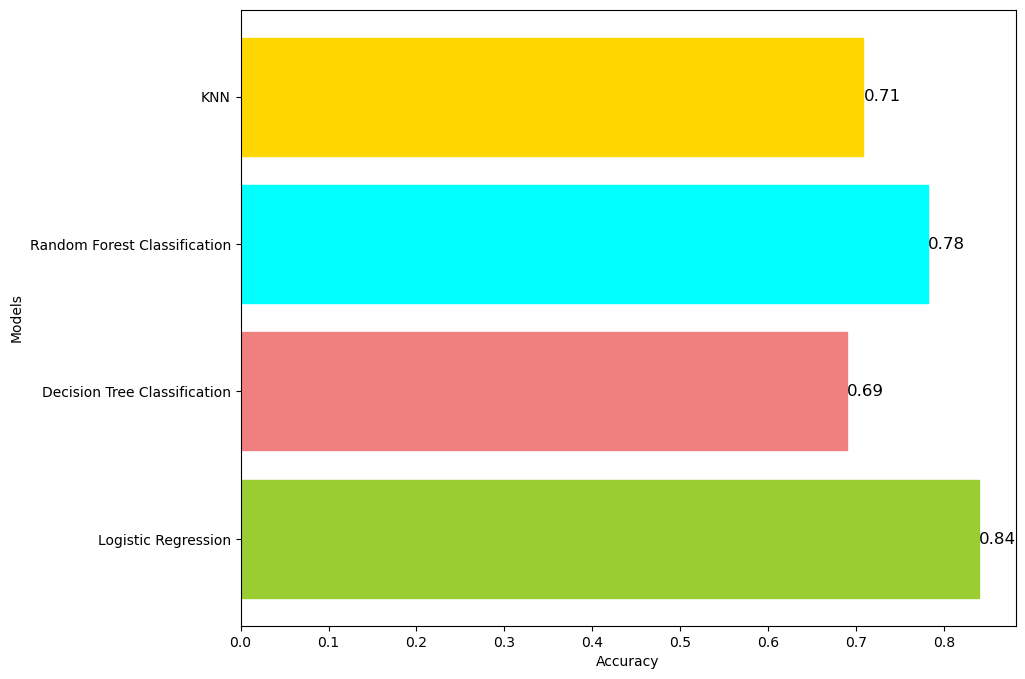

In [67]:
plt.figure(figsize=(10, 8))
graph = plt.barh(names, acc)
plt.xlabel('Accuracy')
plt.ylabel('Models')
graph[0].set_color('yellowgreen')
graph[1].set_color('lightcoral')
graph[2].set_color('cyan')
graph[3].set_color('gold')
for i, v in enumerate(acc):
    plt.text(v, i, str(round(v, 2)), color='black', fontsize=12, va='center')
plt.show()

# We can conclude that Logisctic Regession works best for our dataset